In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Function: Load and clean data from the CSV file
def load_and_clean_data(file_path):
    """
    Load data and clean it:
    - Create a new column 'Elector Ratio' (Electors / Population).
    - Drop rows with missing or invalid 'Elector Ratio'.
    - Save a cleaned and simplified version of the data to 'cleaned_data.csv'.
    """
    data = pd.read_csv(file_path)
    # Data cleaning
    data = data[data['Population'] > 0] 
    data['Elector Ratio'] = data['Electors'] / data['Population'].replace(0, pd.NA)  
    data.dropna(subset=['Elector Ratio'])
    cleaned_data = data[['Province', 'Electoral District Name', 'Elector Ratio', 'Percentage of Voter Turnout']]
    cleaned_data.to_csv('cleaned_data.csv') 
    return cleaned_data
    
file_path = 'election_data.csv'
data = load_and_clean_data(file_path) 
data

,Province,Electoral District Name,Elector Ratio,Percentage of Voter Turnout
0,Newfoundland and Labrador,Avalon,0.813247,59.3
1,Newfoundland and Labrador,Bonavista--Burin--Trinity,0.811782,54.5
2,Newfoundland and Labrador,Coast of Bays--Central--Notre Dame,0.819246,54.9
3,Newfoundland and Labrador,Labrador,0.742141,57.3
4,Newfoundland and Labrador,Long Range Mountains,0.816702,55.2
...,...,...,...,...
333,British Columbia,Victoria,0.846072,72.7
334,British Columbia,West Vancouver--Sunshine Coast--Sea to Sky Cou...,0.800878,68.5
335,Yukon,Yukon,0.824859,71.5
336,Northwest Territories,Northwest Territories/Territoires du Nord-Ouest,0.734792,53.5


In [31]:
# Function: Analyze and filter data based
def analyze_high_ratio_low_turnout(data):
    """
    Identify regions where the Elector Ratio exceeds the specified threshold and Voter Turnout is below the specified threshold.
    Returns the filtered data and prints the summary.
    """
    # standard 
    elector_ratio_threshold=0.75
    voter_turnout_threshold=55
    filtered_data = data[
        (data['Elector Ratio'] > elector_ratio_threshold) & 
        (data['Percentage of Voter Turnout'] < voter_turnout_threshold)
    ]
    return filtered_data

filtered_data = analyze_high_ratio_low_turnout(data)  
analyze_high_ratio_low_turnout(data)

,Province,Electoral District Name,Elector Ratio,Percentage of Voter Turnout
1,Newfoundland and Labrador,Bonavista--Burin--Trinity,0.811782,54.5
2,Newfoundland and Labrador,Coast of Bays--Central--Notre Dame,0.819246,54.9
319,British Columbia,Richmond Centre/Richmond-Centre,0.751809,53.0


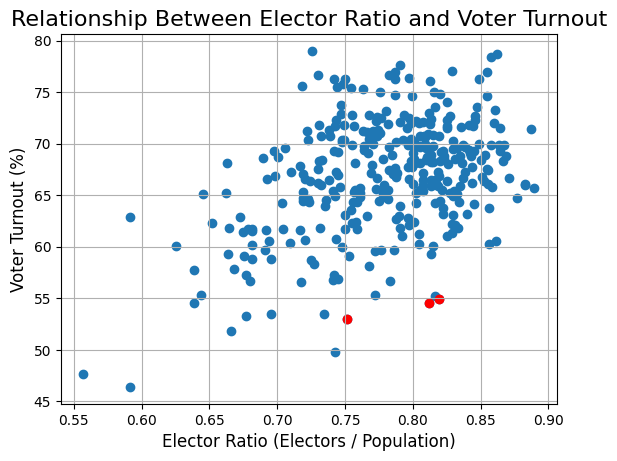

In [32]:
# Function: Visualize data and highlight specific regions
def visualize_data(data, filtered_data):
    """
    Create a scatter plot to visualize the relationship between:
    - Elector Ratio (x-axis) and Voter Turnout (y-axis).
    Highlight the filtered regions in red.
    """

    # Plot all data points
    plt.scatter(data['Elector Ratio'], data['Percentage of Voter Turnout'])
    # Highlight filtered data points
    plt.scatter(filtered_data['Elector Ratio'], 
                filtered_data['Percentage of Voter Turnout'], 
                color='red', label='High Ratio & Low Turnout')


    # Add titles and labels
    plt.title('Relationship Between Elector Ratio and Voter Turnout', fontsize=16)
    plt.xlabel('Elector Ratio (Electors / Population)', fontsize=12)
    plt.ylabel('Voter Turnout (%)', fontsize=12)
    plt.grid()
    plt.show()


visualize_data(data, filtered_data)  

In [33]:
# Function: Save the filtered results to a CSV file
def save_results(filtered_data):
    output_path = f'high_ratio_low_turnout.csv'
    filtered_data.to_csv(output_path, index=False)

save_results(filtered_data)